# Pocket ROG

In [42]:
import pytraj as pt
from BetaPose import utils


a = "/home/yzhang/Downloads/C004HHdUhUfa/C004HHdUhUfa_PDB.pdb"
b = "/home/yzhang/Downloads/C004HHdUhUfa/C004HHdUhUfa_TRJ.nc"

traj=pt.load(b, top=a)
traj.top.set_reference(traj[0])
traj.superpose("@CA")
rogarr = pt.radgyr(traj, ":9733<:5&@O=")
print(rogarr.shape)
pdist, info = utils.PairwiseDistance(traj, ":LIG&!@H=", ":LIG<@6&!:LIG&@C,CA,CB,N,O",use_mean=True); 

(51,)
Calculating pairwise distance


MEAN: 37.719301116472636, STD: 6.3852735423499105


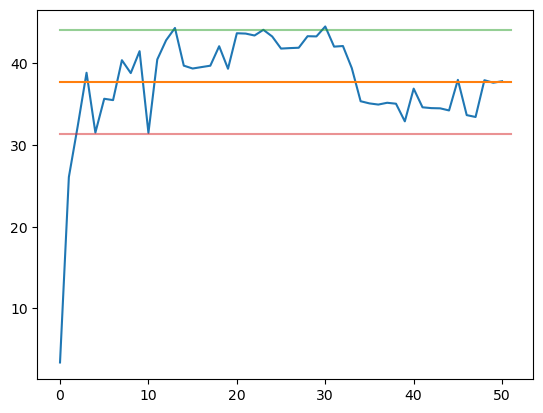

In [37]:
import matplotlib.pyplot as plt
import numpy as np 
plt.plot(rogarr)
x = np.linspace(0, len(rogarr), 50)
print(f"MEAN: {rogarr.mean()}, STD: {rogarr.std()}")
plt.plot(x, [rogarr.mean()]*50)
plt.plot(x, [rogarr.mean()+rogarr.std()]*50, alpha=0.5)
plt.plot(x, [rogarr.mean()-rogarr.std()]*50, alpha=0.5)


[[3.5280156 3.9854367 4.3286386 ... 4.0929947 4.0551558 3.777885 ]
 [3.684533  3.6711588 4.102466  ... 3.9955223 3.7584589 3.6467092]
 [4.97367   4.6299033 4.898427  ... 4.8637023 4.528631  4.2032614]
 ...
 [3.3542514 3.8569412 3.5570765 ... 3.6531239 3.9205766 3.7981334]
 [4.5209165 4.207779  3.7790103 ... 4.7492514 3.9786057 4.040719 ]
 [6.0060163 5.4646683 4.9653435 ... 6.0293303 5.319576  5.209116 ]]


<AxesSubplot:>

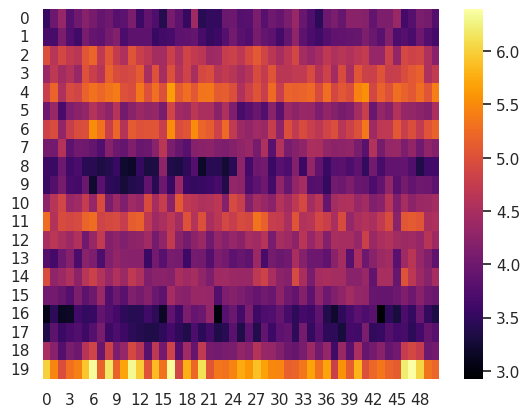

In [44]:
import seaborn as sns; sns.set()
print(pdist)
sns.heatmap(pdist, cmap="inferno")

(51, 2)
[1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]


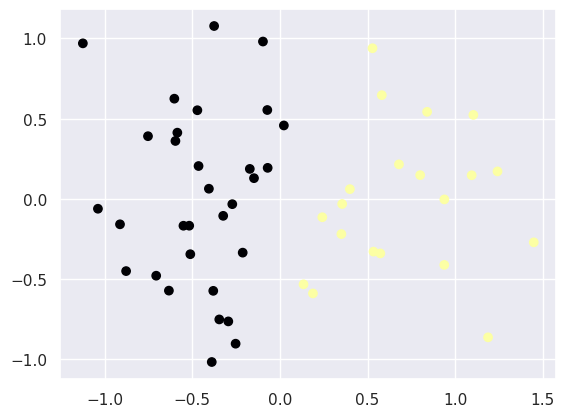

In [66]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from BetaPose.cluster import Agglomerative, _KMeans

pca = PCA(n_components=2)
x = pca.fit_transform(pdist.T)
print(x.shape)
labels = _KMeans(pdist.T, 2)
print(list(labels))
plt.scatter(x[:,0], x[:,1], c=labels, cmap="inferno")


In [73]:
print("\x1b[31m\"this is a test\"\x1b[0m")
#   "red"
from IPython.display import HTML 

HTML("this is a test")
HTML("this is a test2")
HTML("this is a test3")


"this is a test"
